<a href="https://colab.research.google.com/github/keshavg-45/AlzheimersDetetction/blob/main/finalyrproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install classification-models-3D Keras-Applications -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.9/62.9 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 4.5 MB/s eta 0:00:00


In [2]:
pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 KB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 12.7 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=5ae9a87a75dcf3429f9529a1d8c5376622b259fd1c969286d045e800de3c921c
  Stored in directory: /root/.cache/pip/wheels/4c/8e/7e/72fbc243e1aeecae64a96875432e70d4e92f3d2d18123be004
Successfully built pathtools
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


Importing Libraries

In [24]:
import os
import random

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import cv2
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import wandb
from classification_models_3D.tfkeras import Classifiers
from ipywidgets import IntSlider, interact
#from kaggle_secrets import UserSecretsClient
from matplotlib import animation, rc
from matplotlib.patches import PathPatch, Rectangle
from matplotlib.path import Path
from scipy import ndimage
from scipy.ndimage import zoom
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras import Input, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import (BatchNormalization, Conv3D, Dense,
                                     Dropout, GlobalAveragePooling3D,
                                     MaxPool3D)
from tensorflow.keras.optimizers import Adam
from wandb.keras import WandbCallback

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import tqdm
import glob
import tensorflow 

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Random Seed for Reproducibility

In [26]:
seed = 27

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

Weights and Biases Setup

Project Config

Data Loading and Processing

In [44]:
def read_nifti_file(filepath):
    """Read and load volume"""
    # Read file
    scan = nib.load(filepath)
    # Get raw data
    scan = scan.get_fdata()
    return scan


def normalize(volume):
    """Normalize the volume"""
    volume = (volume - np.min(volume)) / (np.max(volume) - np.min(volume))
    return volume.astype('float32')


def resize_volume(img, desired_width=64, desired_height=64, desired_depth=64):
    """Resize the volume"""
    # Compute zoom factors
    width_factor = desired_width / img.shape[0]
    height_factor = desired_height / img.shape[1]
    depth_factor = desired_depth / img.shape[-1]
    # Rotate volume by 90 degrees
    img = ndimage.rotate(img, 90, reshape=False)
    # Resize the volume using spline interpolated zoom (SIZ)
    img = zoom(img, (width_factor, height_factor, depth_factor), order=1)
    return img


def process_scan(path):
    """Read and resize volume"""
    # Read scan
    volume = read_nifti_file(path)
    # Normalize
    volume = normalize(volume)
    # Resize width, height and depth
#     volume = resize_volume(
#         volume, config['img_size'], config['img_size'], config['depth']
#     )
    return volume

Class Distribution

In [45]:
# ad_paths = [
#     os.path.join(os.getcwd(), '/kaggle/input/3cla-adni/AD', x)
#     for x in os.listdir('/kaggle/input/3cla-adni/AD')
# ]

mci_paths = [
    os.path.join(os.getcwd(), '/content/drive/MyDrive/dataset/MCI', x)
    for x in os.listdir('/content/drive/MyDrive/dataset/MCI')
]

cn_paths = [
    os.path.join(os.getcwd(), '/content/drive/MyDrive/dataset/CN', x)
    for x in os.listdir('/content/drive/MyDrive/dataset/CN')
]

ad_paths = [
    os.path.join(os.getcwd(), '/content/drive/MyDrive/dataset/AD', x)
    for x in os.listdir('/content/drive/MyDrive/dataset/AD')
]

# print(f'Number of AD images: {len(ad_paths)}')
print(f'Number of MCI images: {len(mci_paths)}')
print(f'Number of NC images: {len(cn_paths)}')
print(f'Number of AD images: {len(ad_paths)}')

Number of MCI images: 278
Number of NC images: 346
Number of AD images: 275


Build Train and Validation Datasets

In [46]:
mci_labels = np.array([0 for _ in range(len(mci_paths))])
ad_labels = np.array([1 for _ in range(len(ad_paths))])
nc_labels = np.array([1 for _ in range(len(cn_paths))])
CLASS_NAMES = ['MCI', 'CN', 'AD']

# labels = np.concatenate((np.concatenate((mci_labels, ad_labels), axis=0), nc_labels), axis=0)
labels = np.concatenate((mci_labels, nc_labels, ad_labels), axis=0)
# paths = np.concatenate((np.concatenate((mci_paths, ad_paths), axis=0), nc_paths), axis=0)
paths = np.concatenate((mci_paths, cn_paths, ad_labels), axis=0)

In [47]:
train_indices, test_indices = next(
    StratifiedShuffleSplit(1, train_size=0.8, random_state=seed).split(
        paths, labels
    )
)

tmp_labels = [labels[idx] for idx in train_indices]
tmp_paths = [paths[idx] for idx in train_indices]

tmp_train_indices, tmp_val_indices = next(
    StratifiedShuffleSplit(1, train_size=0.8, random_state=seed).split(
        tmp_paths, tmp_labels
    )
)

tmp_train_paths = [tmp_paths[idx] for idx in tmp_train_indices]
tmp_val_paths = [tmp_paths[idx] for idx in tmp_val_indices]

train_indices = [paths.tolist().index(path) for path in tmp_train_paths]
val_indices = [paths.tolist().index(path) for path in tmp_val_paths]

# Check if there are no common indices
#assert bool(set(train_indices) & set(val_indices)) is False
#assert bool(set(train_indices) & set(test_indices)) is False
#assert bool(set(val_indices) & set(test_indices)) is False

print(
    'Number of samples:\n'
    f'train: {len(train_indices)}\n'
    f'validation: {len(val_indices)}\n'
    f'test: {len(test_indices)}'
)

Number of samples:
train: 575
validation: 144
test: 180


Data Augmentation

In [48]:
def random_rotate(volume):
    """Rotate the volume by a few degrees"""

    def scipy_rotate(volume):
        # define some rotation angles
        angles = [-20, -10, -5, 5, 10, 20]
        # pick angles at random
        angle = random.choice(angles)
        # rotate volume
        volume = ndimage.rotate(volume, angle, reshape=False)
        volume[volume < 0] = 0
        volume[volume > 1] = 1
        return volume

    augmented_volume = tf.numpy_function(scipy_rotate, [volume], tf.float32)
    return augmented_volume

In [53]:
class DataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, indices, paths, labels, batch_size=4, dim=(64, 64, 64),
                 n_classes=2, shuffle=True, transform=None):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.paths = paths
        self.labels = labels
        self.indices = indices
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.transform = transform
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.indices) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        # Find list of IDs
        indices_temp = [self.indices[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(indices_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.indices))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, indices_temp):
        'Generates data containing batch_size samples'
        # Initialization
        X = np.empty((self.batch_size, *self.dim, 1))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, ID in enumerate(indices_temp):
            # Store sample
            volume = process_scan(self.paths[ID])
            if self.transform is not None:
                volume = self.transform(volume)
            X[i,] = np.expand_dims(volume, axis=3)

            # Store class
            y[i] = self.labels[ID]

        return X, tf.keras.utils.to_categorical(y, num_classes=self.n_classes)

In [54]:
training_generator = DataGenerator(
    train_indices,
    paths,
    labels,
    batch_size= 4,
    shuffle=True,
    transform=random_rotate,
)

validation_generator = DataGenerator(
    val_indices, 
    paths,
    labels, 
    batch_size= 4,
    shuffle=True,
)

test_generator = DataGenerator(
    test_indices,
    paths,
    labels, 
    batch_size= 1, 
    shuffle=False,
)

Augmented MRI Visualization

Dimensions of the MRI scan are: (113, 137, 113, 1)


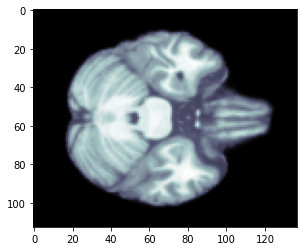

In [55]:
images = process_scan(paths[0])
images = np.expand_dims(images, axis=3)
images = np.expand_dims(images, axis=0)
image = images[0]

print('Dimensions of the MRI scan are:', image.shape)
plt.imshow(np.squeeze(image[:, :, 30]), cmap='bone')

Slice Montage

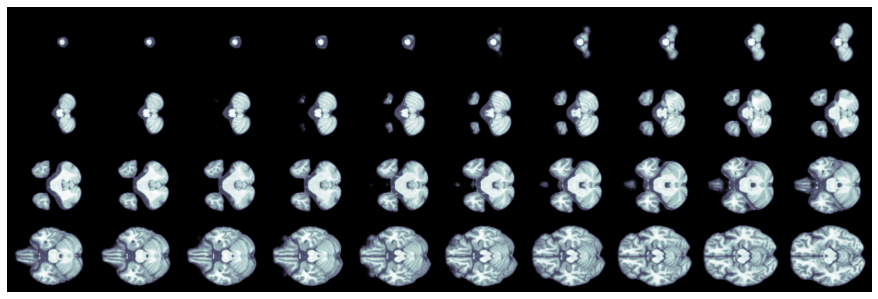

In [56]:
def plot_slices(num_rows, num_columns, width, height, data):
    """Plot a montage of CT slices"""
    data = np.rot90(np.array(data))
    data = np.transpose(data)
    data = np.reshape(data, (num_rows, num_columns, width, height))
    rows_data, columns_data = data.shape[0], data.shape[1]
    heights = [slc[0].shape[0] for slc in data]
    widths = [slc.shape[1] for slc in data[0]]
    fig_width = 12.0
    fig_height = fig_width * sum(heights) / sum(widths)
    _, axarr = plt.subplots(
        rows_data,
        columns_data,
        figsize=(fig_width, fig_height),
        gridspec_kw={'height_ratios': heights},
    )
    for i in range(rows_data):
        for j in range(columns_data):
            axarr[i, j].imshow(data[i][j], cmap='bone')
            axarr[i, j].axis('off')
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()


# Visualize montage of slices.
# 4 rows and 10 columns for 40 slices of the CT scan.
plot_slices(4, 10, 113, 137, image[:, :, :40])

Model Building

3D CNN

In [57]:
def get_model(height=113, width=137, depth=113):
    """Build a 3D convolutional neural network model."""
    modelPoint, _ = Classifiers.get('resnet50')
    net = modelPoint(
        input_shape=(height, width, depth, 1),
        include_top=False,
        weights=None,
    )
    
    x = net.layers[-1].output
    x = GlobalAveragePooling3D()(x)    
    x = Dense(units=128, activation='relu')(x)
    x = Dense(units=64, activation='relu')(x)
    outputs = Dense(units= 2, activation='softmax')(x)
    
    return Model(net.inputs, outputs, name='3D-ResNet50')


# Build model.
model = get_model(height=64, width=64, depth=64)
# model.summary()

Training

In [43]:
# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate= 1e-5),
    metrics=['acc'],
)

# Train the model, doing validation at the end of each epoch
model.fit(
    training_generator,
    validation_data=validation_generator,
    epochs=5,
    verbose=2,
    callbacks=[
        ModelCheckpoint('best.h5', save_best_only=True, monitor='val_loss', mode='min'),
        ReduceLROnPlateau(
            monitor='val_loss',
            mode='min',
            patience=7,
            factor=0.5,
            min_lr= 1e-8,
        ),
        EarlyStopping(monitor='val_loss', mode='min', patience=30, restore_best_weights=True),
    ],
    workers=6
)

Epoch 1/5


UnknownError: ignored

Visualizing Training History

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, metric in enumerate(['acc', 'loss']):
    ax[i].plot(model.history.history[metric])
    ax[i].plot(model.history.history[f'val_{metric}'])
    ax[i].set_title(f'Model {metric}')
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(metric)
    ax[i].legend(['train', 'val'])

In [ ]:
wandb.finish()

Prediction

In [ ]:
model.load_weights('best.h5')
input_volume = test_generator.__getitem__(1)[0]

prediction = model.predict(input_volume)[0]
print(prediction)

DenseNet

In [ ]:
base_model = DenseNet201(input_shape=(224,224,3), 
                         include_top=False,
                         weights="imagenet")

In [ ]:
for layer in base_model.layers:
    layer.trainable=False

In [ ]:
# Building Model

model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

In [ ]:
# Model Compile 

OPT = tensorflow.keras.optimizers.Adam(lr = 0.001)

model.compile(loss='categorical_crossentropy',
              metrics=[tensorflow.keras.metrics.AUC(name = 'auc')],
              optimizer=OPT)

In [ ]:
# Defining Callbacks

filepath = './best_weights.hdf5'

earlystopping = EarlyStopping(monitor = 'val_auc', 
                              mode = 'max' , 
                              patience = 15,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_auc', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

In [ ]:
model_history=model.fit(train_dataset,
                        validation_data=valid_dataset,
                        epochs = 500,
                        callbacks = callback_list,
                        verbose = 1)

Ensemble Approach